In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
from sklearn.preprocessing import scale
import mpld3
from mpld3 import plugins#
import plotly.express as px
import plotly.graph_objects as go


#%matplotlib tk

In [2]:
def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)

In [3]:
df = pd.read_csv("boston_corrected.csv")
map = mpimg.imread('map.png')


In [4]:
minLon = min(df["LON"].values)
maxLon = max(df["LON"].values)
minLat = min(df["LAT"].values)
maxLat = max(df["LAT"].values)

lonRange = maxLon-minLon
latRange = maxLat-minLat
BBox = (minLon,   maxLon, minLat, maxLat)
BBox

(-71.2895, -70.81, 42.03, 42.381)

[[[0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  ...
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]]

 [[0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  ...
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]]

 [[0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  ...
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]]

 ...

 [[0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  ...
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]]

 [[0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  ...
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]]

 [[0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  ...
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]
  [0. 0. 1. 1.]]]


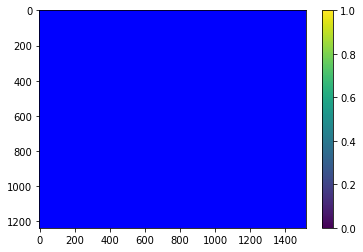

In [84]:
height = map.shape[0]
width = map.shape[1]
MASK = np.ones((height, width, 4))

for x in range(width):
    for y in range(height):
        map_col = map[y,x]

        MASK[y,x,:] = [0,0,1,1]

        #print(map_col[3])
        if(map_col[2]> 100.0/255 and map_col[1] < 200/255.0):
            MASK[y,x,:] = [0,0,0,1]
            #print("here")
        
        
    
print(MASK)
plt.imshow(MASK)
plt.colorbar()


(1238, 1516, 4)


<ipython-input-82-704822420c20>:22: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



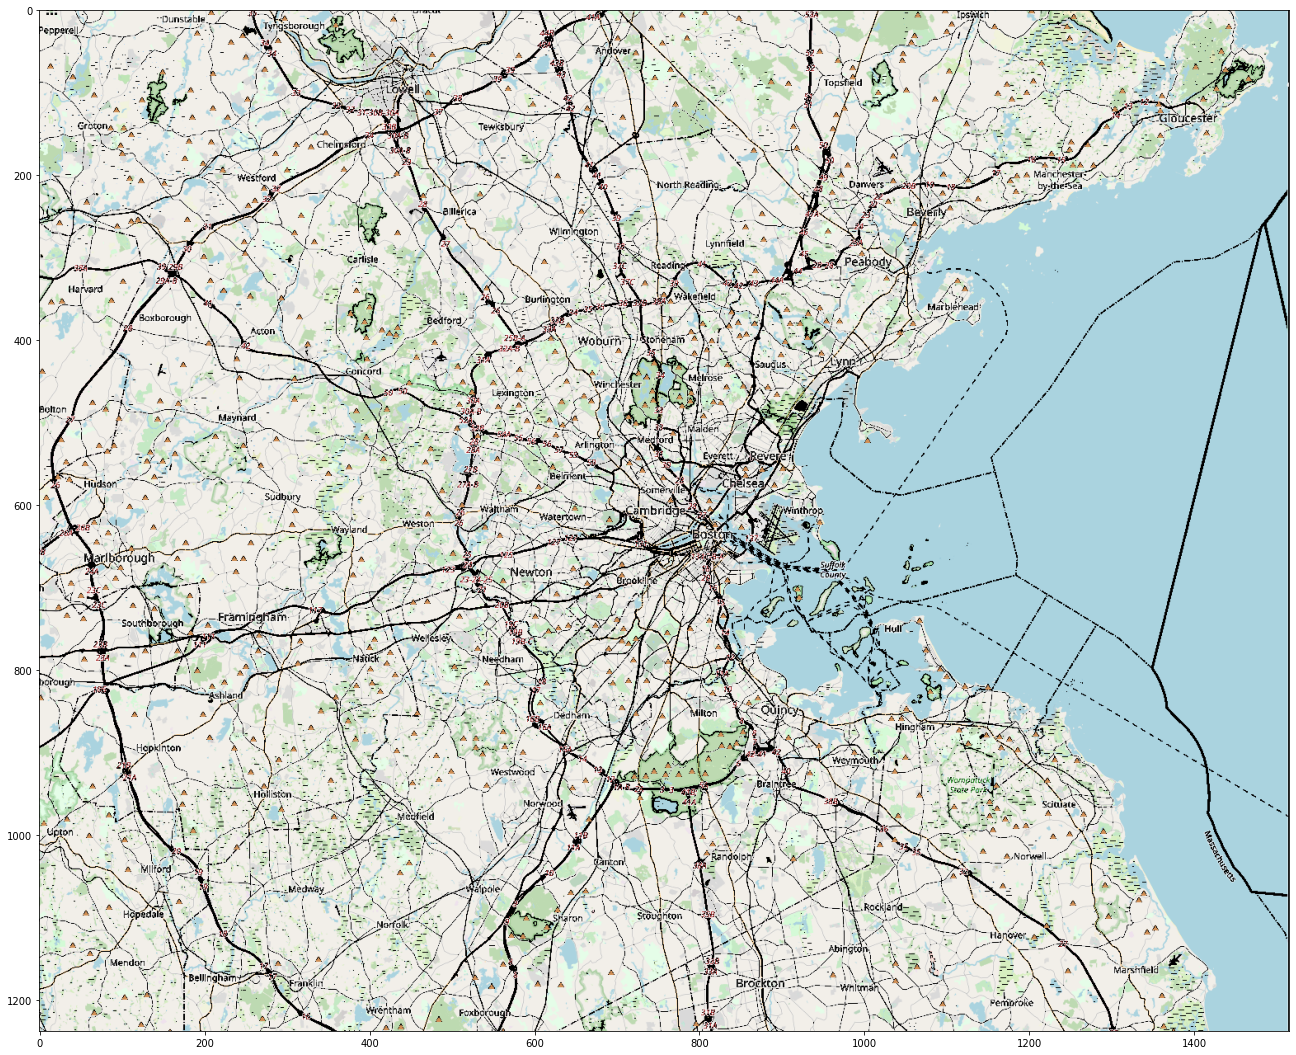

In [82]:

data = df.copy()#df.loc[(df["TOWN"]=="Chelsea") | (df["TOWN"]=="Quincy") | (df["TOWN"]=="Marblehead") | (df["CHAS"]==1)]

fig = plt.figure(figsize=(11.20 * 2, 15.11 * 2))

print(map.shape)
#cid = fig.canvas.mpl_connect('button_press_event', onclick)
masked_map = np.clip(map * MASK, 0, 1)
plt.imshow(masked_map)

fig.show()

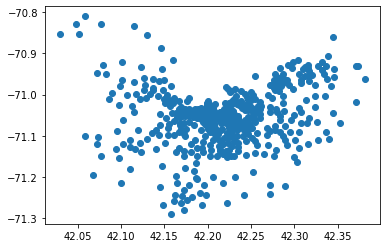

In [5]:
plt.scatter(df["LAT"], df["LON"])


In [63]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow.keras.backend as be
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.preprocessing import scale

train_set, test_set = train_test_split(df, test_size=0.01, random_state=26)
TARGET = 'CMEDV'

In [64]:

def CreateModel(size):


    model = keras.models.Sequential()
    model.add(keras.layers.Dense(2))
    model.add(keras.layers.Dense(40, activation='relu'))
    model.add(keras.layers.Dense(40, activation='selu'))
    model.add(keras.layers.Dense(40, activation='relu'))
    model.add(keras.layers.Dense(40, activation='selu'))
    model.add(keras.layers.Dense(size))
    model.compile(loss="mse", optimizer="adam", metrics=["mean_squared_error"])

    return model

def removeVar(list, var):
    return [x for x in list if x != var]


In [65]:
INPUT_VARS= ["LON","LAT"]
OUTPUT_VARS = ["CMEDV", "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

INPUT_SCALER, OUTPUT_SCALER = StandardScaler(),StandardScaler()
INPUT_SCALER.fit(train_set[INPUT_VARS])
OUTPUT_SCALER.fit(train_set[OUTPUT_VARS])

Input = INPUT_SCALER.transform(train_set[INPUT_VARS])
Output = OUTPUT_SCALER.transform(train_set[OUTPUT_VARS])

model = CreateModel(len(OUTPUT_VARS))

model.fit(Input, Output, epochs=250, batch_size=10)



Epoch 1/250
50/50 [==============================] - 0s 1ms/step - loss: 0.9387 - mean_squared_error: 0.9387
Epoch 2/250
50/50 [==============================] - 0s 1ms/step - loss: 0.7723 - mean_squared_error: 0.7723
Epoch 3/250
50/50 [==============================] - 0s 1ms/step - loss: 0.6337 - mean_squared_error: 0.6337
Epoch 4/250
50/50 [==============================] - 0s 1ms/step - loss: 0.5679 - mean_squared_error: 0.5679
Epoch 5/250
50/50 [==============================] - 0s 1ms/step - loss: 0.5384 - mean_squared_error: 0.5384
Epoch 6/250
50/50 [==============================] - 0s 1ms/step - loss: 0.5134 - mean_squared_error: 0.5134
Epoch 7/250
50/50 [==============================] - 0s 940us/step - loss: 0.5021 - mean_squared_error: 0.5021
Epoch 8/250
50/50 [==============================] - 0s 976us/step - loss: 0.4868 - mean_squared_error: 0.4868
Epoch 9/250
50/50 [==============================] - 0s 904us/step - loss: 0.4765 - mean_squared_error: 0.4765
Epoch 10/250


50/50 [==============================] - 0s 973us/step - loss: 0.3279 - mean_squared_error: 0.3279
Epoch 76/250
50/50 [==============================] - 0s 920us/step - loss: 0.3307 - mean_squared_error: 0.3307
Epoch 77/250
50/50 [==============================] - 0s 960us/step - loss: 0.3257 - mean_squared_error: 0.3257
Epoch 78/250
50/50 [==============================] - 0s 1ms/step - loss: 0.3239 - mean_squared_error: 0.3239
Epoch 79/250
50/50 [==============================] - 0s 968us/step - loss: 0.3233 - mean_squared_error: 0.3233
Epoch 80/250
50/50 [==============================] - 0s 1ms/step - loss: 0.3266 - mean_squared_error: 0.3266
Epoch 81/250
50/50 [==============================] - 0s 945us/step - loss: 0.3237 - mean_squared_error: 0.3237
Epoch 82/250
50/50 [==============================] - 0s 943us/step - loss: 0.3239 - mean_squared_error: 0.3239
Epoch 83/250
50/50 [==============================] - 0s 972us/step - loss: 0.3187 - mean_squared_error: 0.3187
Epoch 84/

Epoch 148/250
50/50 [==============================] - 0s 1ms/step - loss: 0.2726 - mean_squared_error: 0.2726
Epoch 149/250
50/50 [==============================] - 0s 1ms/step - loss: 0.2782 - mean_squared_error: 0.2782
Epoch 150/250
50/50 [==============================] - 0s 839us/step - loss: 0.2662 - mean_squared_error: 0.2662
Epoch 151/250
50/50 [==============================] - 0s 858us/step - loss: 0.2744 - mean_squared_error: 0.2744
Epoch 152/250
50/50 [==============================] - 0s 1ms/step - loss: 0.2719 - mean_squared_error: 0.2719
Epoch 153/250
50/50 [==============================] - 0s 1ms/step - loss: 0.2724 - mean_squared_error: 0.2724
Epoch 154/250
50/50 [==============================] - 0s 780us/step - loss: 0.2732 - mean_squared_error: 0.2732
Epoch 155/250
50/50 [==============================] - 0s 786us/step - loss: 0.2781 - mean_squared_error: 0.2781
Epoch 156/250
50/50 [==============================] - 0s 1ms/step - loss: 0.2702 - mean_squared_error: 

(500, 14)


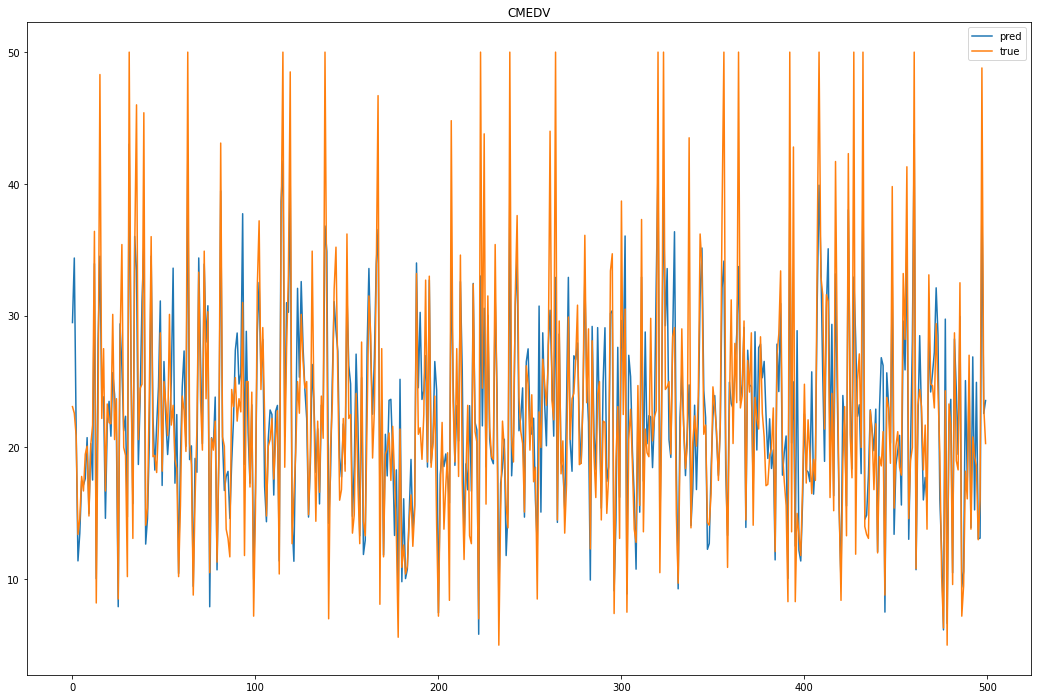

In [66]:
# scaled_predict_input = INPUT_SCALER.transform(test_set[INPUT_VARS])
# test_output = test_set[OUTPUT_VARS].values
# print(test_output.shape)
# model_predict = OUTPUT_SCALER.inverse_transform(model.predict(scaled_predict_input))
# #print(model_predict[:,0])
scaled_predict_input = INPUT_SCALER.transform(train_set[INPUT_VARS])
test_output = train_set[OUTPUT_VARS].values
print(test_output.shape)
model_predict = OUTPUT_SCALER.inverse_transform(model.predict(scaled_predict_input))
#print(model


i=0
plt.figure(figsize=(18,12))
plt.title(OUTPUT_VARS[i])
plt.plot(model_predict[:,i], label="pred")
plt.plot(test_output[:,i], label="true")
plt.legend()
plt.show()

In [14]:
input_pos_vars = ["LON","LAT"]
input_rest_vars = ["TOWNNO", "TRACT", "CMEDV", "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

input_pos = scale(train_set[input_pos_vars].values)#
input_test_pos = scale(test_set[input_pos_vars].values)

print(input_test_pos.shape)



(102, 2)


(404,)
(102, 1)
Pos % difference was:  [[0.08628757 1.55737187 0.47686188 ... 1.44244341 0.76418303 0.75287264]
 [1.03144325 0.43964104 1.59459271 ... 0.32471258 1.88191386 0.36485818]
 [0.23550473 1.70658903 0.32764472 ... 1.59166057 0.61496588 0.9020898 ]
 ...
 [0.39063035 1.86171464 0.17251911 ... 1.74678618 0.45984026 1.05721542]
 [0.9352759  2.40636019 0.37212644 ... 2.29143173 0.08480529 1.60186097]
 [1.29187228 0.17921202 1.85502173 ... 0.06428356 2.14234289 0.62528721]]
Rest % difference was:  [[0.08628757 1.55737187 0.47686188 ... 1.44244341 0.76418303 0.75287264]
 [1.03144325 0.43964104 1.59459271 ... 0.32471258 1.88191386 0.36485818]
 [0.23550473 1.70658903 0.32764472 ... 1.59166057 0.61496588 0.9020898 ]
 ...
 [0.39063035 1.86171464 0.17251911 ... 1.74678618 0.45984026 1.05721542]
 [0.9352759  2.40636019 0.37212644 ... 2.29143173 0.08480529 1.60186097]
 [1.29187228 0.17921202 1.85502173 ... 0.06428356 2.14234289 0.62528721]]


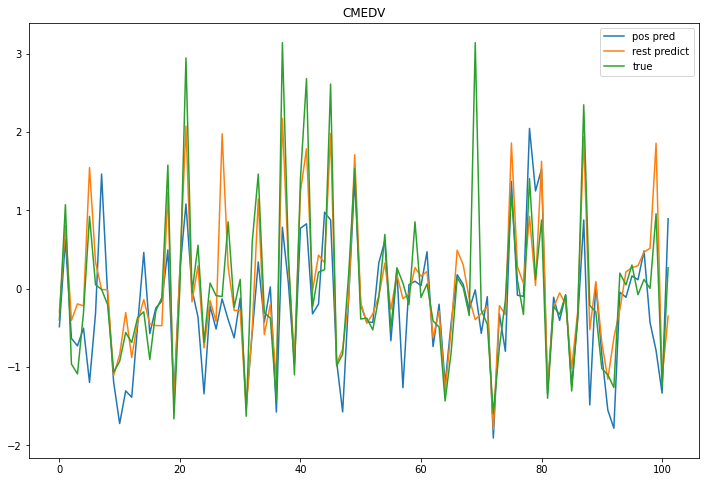

(404,)
(102, 1)
Pos % difference was:  [[0.2239698  0.25165478 0.16663242 ... 0.17256438 0.03450665 0.2212041 ]
 [0.01934695 0.00833802 0.07668434 ... 0.07075237 0.27782341 0.46452086]
 [1.72754347 1.75522845 1.67020609 ... 1.67613805 1.46906702 1.28236957]
 ...
 [1.12205297 1.14973794 1.06471558 ... 1.07064755 0.86357651 0.67687906]
 [3.22924959 3.25693457 3.17191221 ... 3.17784417 2.97077314 2.78407569]
 [0.33950434 0.36718932 0.28216696 ... 0.28809892 0.08102789 0.10566956]]
Rest % difference was:  [[0.2239698  0.25165478 0.16663242 ... 0.17256438 0.03450665 0.2212041 ]
 [0.01934695 0.00833802 0.07668434 ... 0.07075237 0.27782341 0.46452086]
 [1.72754347 1.75522845 1.67020609 ... 1.67613805 1.46906702 1.28236957]
 ...
 [1.12205297 1.14973794 1.06471558 ... 1.07064755 0.86357651 0.67687906]
 [3.22924959 3.25693457 3.17191221 ... 3.17784417 2.97077314 2.78407569]
 [0.33950434 0.36718932 0.28216696 ... 0.28809892 0.08102789 0.10566956]]


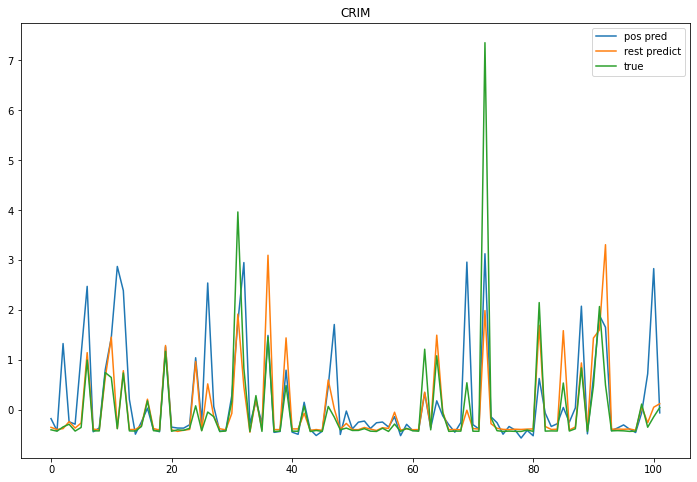

(404,)
(102, 1)
Pos % difference was:  [[0.02434561 1.70153483 0.02434561 ... 0.76976304 0.02434561 0.02434561]
 [0.2579574  1.41923182 0.2579574  ... 0.48746003 0.2579574  0.2579574 ]
 [0.01226285 1.68945207 0.01226285 ... 0.75768028 0.01226285 0.01226285]
 ...
 [0.2853736  1.39181562 0.2853736  ... 0.46004383 0.2853736  0.2853736 ]
 [0.0207847  1.65640451 0.0207847  ... 0.72463273 0.0207847  0.0207847 ]
 [0.6002261  1.07696311 0.6002261  ... 0.14519133 0.6002261  0.6002261 ]]
Rest % difference was:  [[0.02434561 1.70153483 0.02434561 ... 0.76976304 0.02434561 0.02434561]
 [0.2579574  1.41923182 0.2579574  ... 0.48746003 0.2579574  0.2579574 ]
 [0.01226285 1.68945207 0.01226285 ... 0.75768028 0.01226285 0.01226285]
 ...
 [0.2853736  1.39181562 0.2853736  ... 0.46004383 0.2853736  0.2853736 ]
 [0.0207847  1.65640451 0.0207847  ... 0.72463273 0.0207847  0.0207847 ]
 [0.6002261  1.07696311 0.6002261  ... 0.14519133 0.6002261  0.6002261 ]]


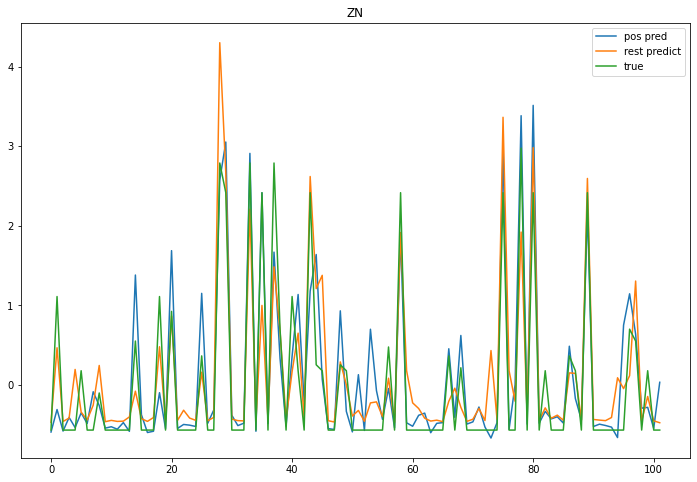

(404,)
(102, 1)
Pos % difference was:  [[0.19515282 2.41212083 0.19515282 ... 2.33722353 0.13128632 0.34043347]
 [2.60429031 0.00298334 2.60429031 ... 0.07191395 2.27785117 2.06870401]
 [0.04513162 2.65240527 0.04513162 ... 2.57750798 0.37157076 0.58071792]
 ...
 [0.82385314 1.78342051 0.82385314 ... 1.70852322 0.497414   0.28826684]
 [0.39547509 2.21179856 0.39547509 ... 2.13690126 0.06903595 0.1401112 ]
 [2.00889069 0.59838296 2.00889069 ... 0.52348566 1.68245155 1.4733044 ]]
Rest % difference was:  [[0.19515282 2.41212083 0.19515282 ... 2.33722353 0.13128632 0.34043347]
 [2.60429031 0.00298334 2.60429031 ... 0.07191395 2.27785117 2.06870401]
 [0.04513162 2.65240527 0.04513162 ... 2.57750798 0.37157076 0.58071792]
 ...
 [0.82385314 1.78342051 0.82385314 ... 1.70852322 0.497414   0.28826684]
 [0.39547509 2.21179856 0.39547509 ... 2.13690126 0.06903595 0.1401112 ]
 [2.00889069 0.59838296 2.00889069 ... 0.52348566 1.68245155 1.4733044 ]]


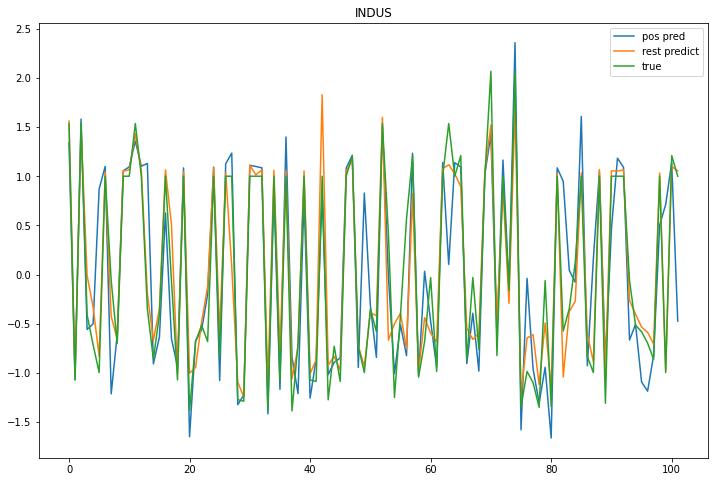

(404,)
(102, 1)
Pos % difference was:  [[0.03004104 0.03004104 0.03004104 ... 0.03004104 0.03004104 0.03004104]
 [0.05459565 0.05459565 0.05459565 ... 0.05459565 0.05459565 0.05459565]
 [0.00967431 0.00967431 0.00967431 ... 0.00967431 0.00967431 0.00967431]
 ...
 [0.09207225 0.09207225 0.09207225 ... 0.09207225 0.09207225 0.09207225]
 [0.36594365 0.36594365 0.36594365 ... 0.36594365 0.36594365 0.36594365]
 [0.23597008 0.23597008 0.23597008 ... 0.23597008 0.23597008 0.23597008]]
Rest % difference was:  [[0.03004104 0.03004104 0.03004104 ... 0.03004104 0.03004104 0.03004104]
 [0.05459565 0.05459565 0.05459565 ... 0.05459565 0.05459565 0.05459565]
 [0.00967431 0.00967431 0.00967431 ... 0.00967431 0.00967431 0.00967431]
 ...
 [0.09207225 0.09207225 0.09207225 ... 0.09207225 0.09207225 0.09207225]
 [0.36594365 0.36594365 0.36594365 ... 0.36594365 0.36594365 0.36594365]
 [0.23597008 0.23597008 0.23597008 ... 0.23597008 0.23597008 0.23597008]]


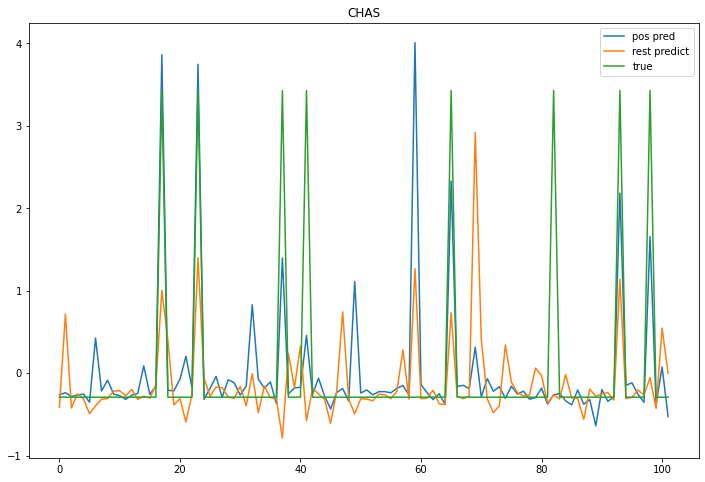

(404,)
(102, 1)
Pos % difference was:  [[0.30386648 1.18813991 0.30386648 ... 0.48737529 2.2745915  1.46874848]
 [1.29467184 0.19733455 1.29467184 ... 1.47818065 3.26539686 2.45955383]
 [0.21245257 1.27955382 0.21245257 ... 0.39596137 2.18317758 1.37733456]
 ...
 [0.36912119 1.86112758 0.36912119 ... 0.18561238 1.60160383 0.79576081]
 [0.80547416 2.29748055 0.80547416 ... 0.62196535 1.16525086 0.35940784]
 [0.74525427 2.23726066 0.74525427 ... 0.56174547 1.22547075 0.41962772]]
Rest % difference was:  [[0.30386648 1.18813991 0.30386648 ... 0.48737529 2.2745915  1.46874848]
 [1.29467184 0.19733455 1.29467184 ... 1.47818065 3.26539686 2.45955383]
 [0.21245257 1.27955382 0.21245257 ... 0.39596137 2.18317758 1.37733456]
 ...
 [0.36912119 1.86112758 0.36912119 ... 0.18561238 1.60160383 0.79576081]
 [0.80547416 2.29748055 0.80547416 ... 0.62196535 1.16525086 0.35940784]
 [0.74525427 2.23726066 0.74525427 ... 0.56174547 1.22547075 0.41962772]]


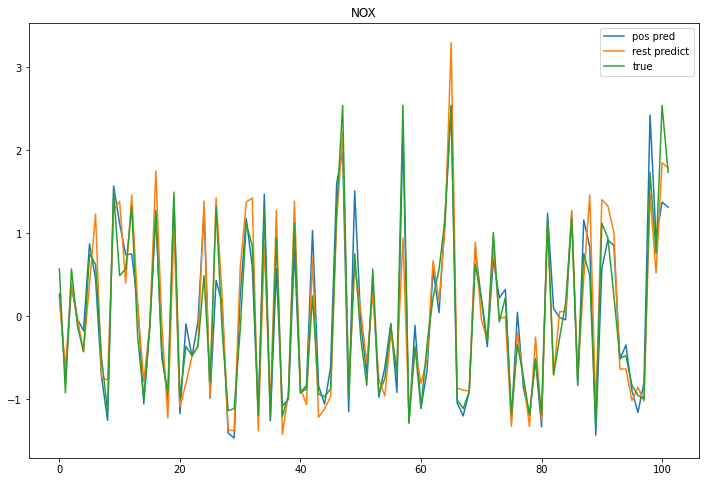

(404,)
(102, 1)
Pos % difference was:  [[0.62520343 1.10722892 0.59622537 ... 1.91804341 1.68822139 0.53593945]
 [0.21627236 0.26575314 1.43770115 ... 1.07656762 2.52969717 0.30553634]
 [0.66450304 1.14652853 0.55692576 ... 1.95734302 1.64892178 0.57523906]
 ...
 [0.29730724 0.77933273 0.92412156 ... 1.59014722 2.01611758 0.20804326]
 [1.18188476 1.66391026 0.03954403 ... 2.47472474 1.13154006 1.09262078]
 [0.54549802 0.06347252 1.76692681 ... 0.74734196 2.85892283 0.634762  ]]
Rest % difference was:  [[0.62520343 1.10722892 0.59622537 ... 1.91804341 1.68822139 0.53593945]
 [0.21627236 0.26575314 1.43770115 ... 1.07656762 2.52969717 0.30553634]
 [0.66450304 1.14652853 0.55692576 ... 1.95734302 1.64892178 0.57523906]
 ...
 [0.29730724 0.77933273 0.92412156 ... 1.59014722 2.01611758 0.20804326]
 [1.18188476 1.66391026 0.03954403 ... 2.47472474 1.13154006 1.09262078]
 [0.54549802 0.06347252 1.76692681 ... 0.74734196 2.85892283 0.634762  ]]


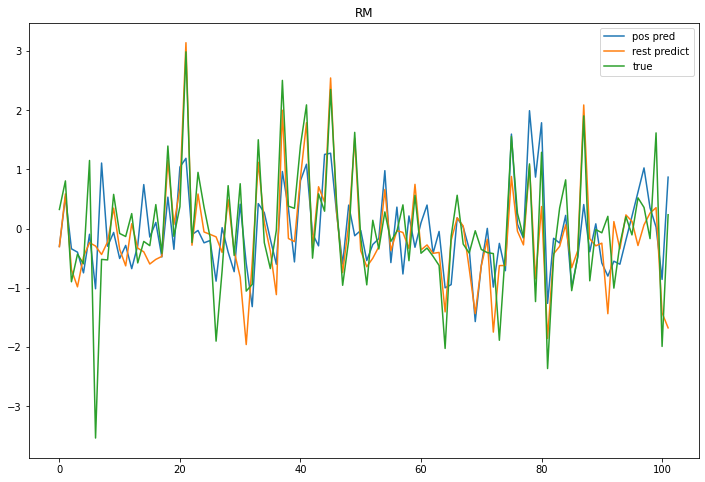

(404,)
(102, 1)
Pos % difference was:  [[0.17409712 1.75764814 0.03372808 ... 0.02704384 0.1373338  0.19019395]
 [1.8361178  0.09562746 1.69574877 ... 1.68906453 1.79935448 1.47182674]
 [0.14974719 1.78199807 0.00937816 ... 0.00269392 0.11298387 0.21454387]
 ...
 [0.43841761 1.49332765 0.29804858 ... 0.29136434 0.40165429 0.07412655]
 [0.11327463 1.81847063 0.0270944  ... 0.03377864 0.07651131 0.25101643]
 [0.48848766 1.4432576  0.34811862 ... 0.34143438 0.45172434 0.12419659]]
Rest % difference was:  [[0.17409712 1.75764814 0.03372808 ... 0.02704384 0.1373338  0.19019395]
 [1.8361178  0.09562746 1.69574877 ... 1.68906453 1.79935448 1.47182674]
 [0.14974719 1.78199807 0.00937816 ... 0.00269392 0.11298387 0.21454387]
 ...
 [0.43841761 1.49332765 0.29804858 ... 0.29136434 0.40165429 0.07412655]
 [0.11327463 1.81847063 0.0270944  ... 0.03377864 0.07651131 0.25101643]
 [0.48848766 1.4432576  0.34811862 ... 0.34143438 0.45172434 0.12419659]]


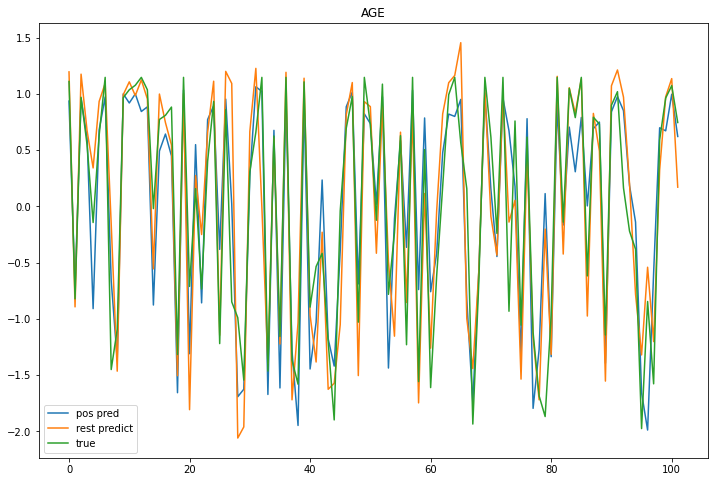

(404,)
(102, 1)
Pos % difference was:  [[0.09390331 0.79144503 0.03601499 ... 0.07732202 0.22878439 0.26084387]
 [0.80073597 0.10319425 0.85862429 ... 0.81731726 1.12342367 0.63379541]
 [0.15710027 0.85464199 0.09921195 ... 0.14051898 0.16558744 0.32404083]
 ...
 [0.12694467 0.82448639 0.06905635 ... 0.11036338 0.19574303 0.29388523]
 [0.40011049 1.09765221 0.34222217 ... 0.3835292  0.07742279 0.56705105]
 [0.02213348 0.7196752  0.03575484 ... 0.00555219 0.30055423 0.18907403]]
Rest % difference was:  [[0.09390331 0.79144503 0.03601499 ... 0.07732202 0.22878439 0.26084387]
 [0.80073597 0.10319425 0.85862429 ... 0.81731726 1.12342367 0.63379541]
 [0.15710027 0.85464199 0.09921195 ... 0.14051898 0.16558744 0.32404083]
 ...
 [0.12694467 0.82448639 0.06905635 ... 0.11036338 0.19574303 0.29388523]
 [0.40011049 1.09765221 0.34222217 ... 0.3835292  0.07742279 0.56705105]
 [0.02213348 0.7196752  0.03575484 ... 0.00555219 0.30055423 0.18907403]]


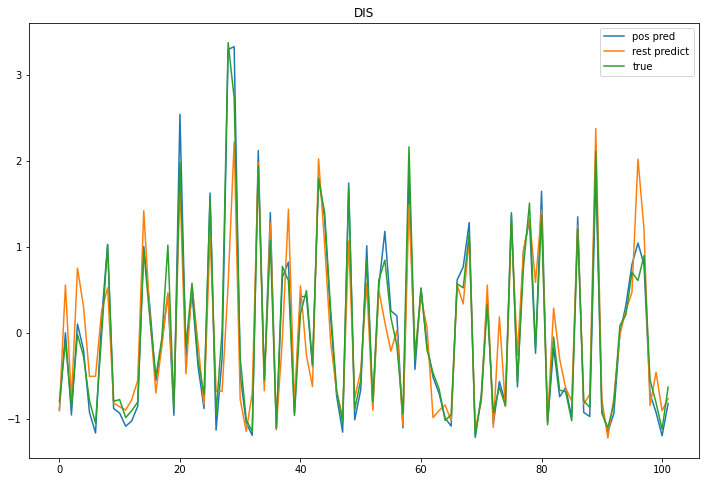

(404,)
(102, 1)
Pos % difference was:  [[0.0238734  0.08805351 0.0238734  ... 0.08805351 0.08805351 2.21466491]
 [0.07784565 0.03408127 0.07784565 ... 0.03408127 0.03408127 2.16069267]
 [0.04772572 0.15965264 0.04772572 ... 0.15965264 0.15965264 2.28626404]
 ...
 [2.17328705 2.06136013 2.17328705 ... 2.06136013 2.06136013 0.06525127]
 [2.36357679 2.25164987 2.36357679 ... 2.25164987 2.25164987 0.12503847]
 [0.64368579 0.53175887 0.64368579 ... 0.53175887 0.53175887 1.59485253]]
Rest % difference was:  [[0.0238734  0.08805351 0.0238734  ... 0.08805351 0.08805351 2.21466491]
 [0.07784565 0.03408127 0.07784565 ... 0.03408127 0.03408127 2.16069267]
 [0.04772572 0.15965264 0.04772572 ... 0.15965264 0.15965264 2.28626404]
 ...
 [2.17328705 2.06136013 2.17328705 ... 2.06136013 2.06136013 0.06525127]
 [2.36357679 2.25164987 2.36357679 ... 2.25164987 2.25164987 0.12503847]
 [0.64368579 0.53175887 0.64368579 ... 0.53175887 0.53175887 1.59485253]]


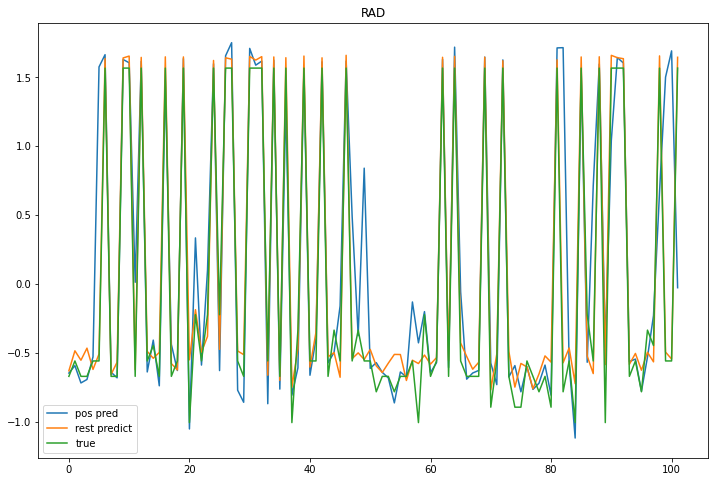

(404,)
(102, 1)
Pos % difference was:  [[0.07476962 0.15372399 0.07476962 ... 0.9388046  0.12442994 1.41643723]
 [0.93355327 0.70505966 0.93355327 ... 0.08002095 0.73435372 2.27522088]
 [0.09560892 0.13288469 0.09560892 ... 0.9179653  0.10359064 1.43727653]
 ...
 [1.28263468 1.51112829 1.28263468 ... 2.2962089  1.48183424 0.05903293]
 [1.43262572 1.66111933 1.43262572 ... 2.44619994 1.63182527 0.09095811]
 [0.23187714 0.00338353 0.23187714 ... 0.78169708 0.03267758 1.57354474]]
Rest % difference was:  [[0.07476962 0.15372399 0.07476962 ... 0.9388046  0.12442994 1.41643723]
 [0.93355327 0.70505966 0.93355327 ... 0.08002095 0.73435372 2.27522088]
 [0.09560892 0.13288469 0.09560892 ... 0.9179653  0.10359064 1.43727653]
 ...
 [1.28263468 1.51112829 1.28263468 ... 2.2962089  1.48183424 0.05903293]
 [1.43262572 1.66111933 1.43262572 ... 2.44619994 1.63182527 0.09095811]
 [0.23187714 0.00338353 0.23187714 ... 0.78169708 0.03267758 1.57354474]]


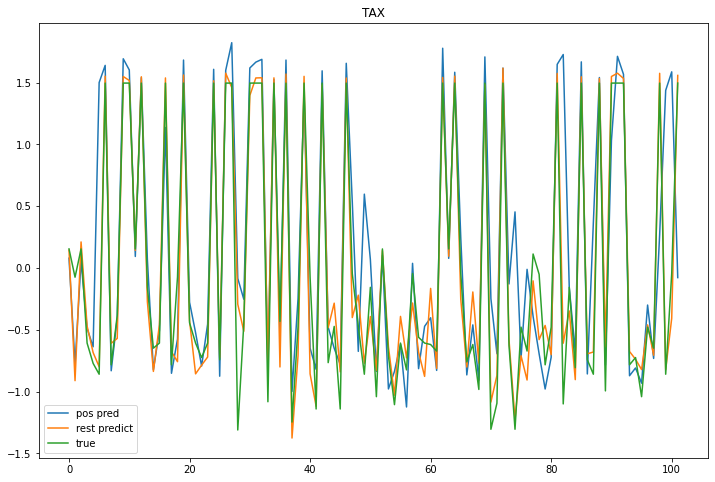

(404,)
(102, 1)
Pos % difference was:  [[0.64061986 3.16150951 0.64061986 ... 4.08583572 3.37158365 1.06076814]
 [2.14229811 0.37859154 2.14229811 ... 1.30291774 0.58866568 1.72214984]
 [0.22645782 2.74734747 0.22645782 ... 3.67167368 2.95742161 0.6466061 ]
 ...
 [0.34586466 2.17502499 0.34586466 ... 3.09935119 2.38509912 0.07428361]
 [0.36750938 2.15338028 0.36750938 ... 3.07770648 2.36345441 0.0526389 ]
 [2.9465325  0.42564285 2.9465325  ... 0.49868336 0.21556871 2.52638422]]
Rest % difference was:  [[0.64061986 3.16150951 0.64061986 ... 4.08583572 3.37158365 1.06076814]
 [2.14229811 0.37859154 2.14229811 ... 1.30291774 0.58866568 1.72214984]
 [0.22645782 2.74734747 0.22645782 ... 3.67167368 2.95742161 0.6466061 ]
 ...
 [0.34586466 2.17502499 0.34586466 ... 3.09935119 2.38509912 0.07428361]
 [0.36750938 2.15338028 0.36750938 ... 3.07770648 2.36345441 0.0526389 ]
 [2.9465325  0.42564285 2.9465325  ... 0.49868336 0.21556871 2.52638422]]


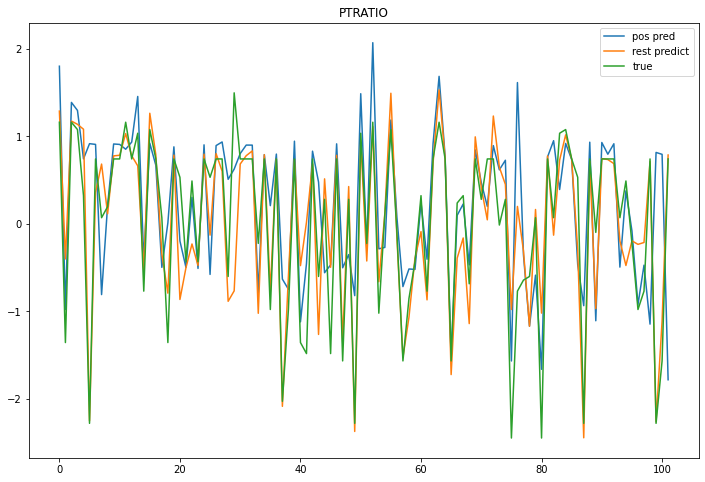

(404,)
(102, 1)
Pos % difference was:  [[0.09091711 0.10445604 0.06939368 ... 0.10966332 0.06939368 0.3279062 ]
 [0.15795696 0.14441803 0.17948038 ... 0.13921075 0.17948038 0.07903214]
 [0.0449636  0.05850252 0.02344017 ... 0.0637098  0.02344017 0.28195269]
 ...
 [2.07788307 2.06434414 2.09940649 ... 2.05913686 2.09940649 1.84089397]
 [0.02933002 0.01579109 0.05085344 ... 0.01058381 0.05085344 0.20765908]
 [0.0976789  0.08413997 0.11920233 ... 0.07893269 0.11920233 0.13931019]]
Rest % difference was:  [[0.09091711 0.10445604 0.06939368 ... 0.10966332 0.06939368 0.3279062 ]
 [0.15795696 0.14441803 0.17948038 ... 0.13921075 0.17948038 0.07903214]
 [0.0449636  0.05850252 0.02344017 ... 0.0637098  0.02344017 0.28195269]
 ...
 [2.07788307 2.06434414 2.09940649 ... 2.05913686 2.09940649 1.84089397]
 [0.02933002 0.01579109 0.05085344 ... 0.01058381 0.05085344 0.20765908]
 [0.0976789  0.08413997 0.11920233 ... 0.07893269 0.11920233 0.13931019]]


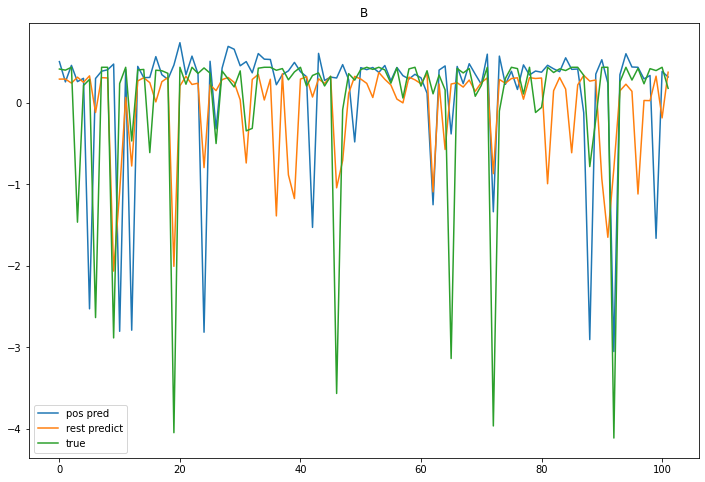

(404,)
(102, 1)
Pos % difference was:  [[0.47617548 1.37347095 0.39383735 ... 0.68079523 2.05353083 1.20522805]
 [0.88558177 0.0117137  1.7555946  ... 0.68096202 3.41528808 0.1565292 ]
 [0.67697563 1.5742711  0.1930372  ... 0.88159538 1.85273068 1.4060282 ]
 ...
 [0.1409772  1.03827267 0.72903564 ... 0.34559694 2.38872911 0.87002977]
 [1.547358   2.44465347 0.67734517 ... 1.75197775 0.98234831 2.27641057]
 [0.54025028 0.35704519 1.41026311 ... 0.33563053 3.06995659 0.18880229]]
Rest % difference was:  [[0.47617548 1.37347095 0.39383735 ... 0.68079523 2.05353083 1.20522805]
 [0.88558177 0.0117137  1.7555946  ... 0.68096202 3.41528808 0.1565292 ]
 [0.67697563 1.5742711  0.1930372  ... 0.88159538 1.85273068 1.4060282 ]
 ...
 [0.1409772  1.03827267 0.72903564 ... 0.34559694 2.38872911 0.87002977]
 [1.547358   2.44465347 0.67734517 ... 1.75197775 0.98234831 2.27641057]
 [0.54025028 0.35704519 1.41026311 ... 0.33563053 3.06995659 0.18880229]]


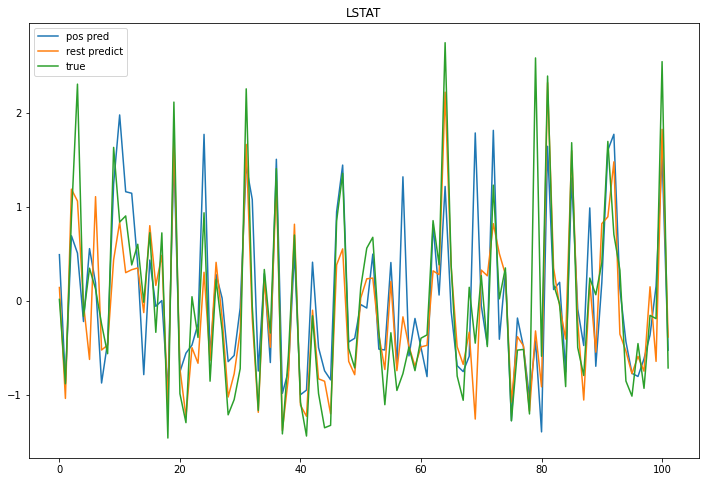

In [58]:

EPOCHS = 100
BATSIZE = 8

dont_train_for = ["TOWNNO", "TRACT"]

for var in input_rest_vars:

    if var in dont_train_for:
        continue

    vars_rest = removeVar(input_rest_vars, var)
    input_rest = scale(train_set[vars_rest].values) #We remove the current variable from out input list

    output = scale(train_set[var].values)

    model_pos = CreateModel()
    model_rest = CreateModel()

    model_pos.fit(input_pos, output, epochs=EPOCHS, batch_size=BATSIZE, verbose=0)
    model_rest.fit(input_rest, output, epochs=EPOCHS, batch_size=BATSIZE, verbose=0)

    input_test_rest = scale(test_set[vars_rest].values)

    print(output.shape)
    pos_predict = model_pos.predict(input_test_pos)
    rest_predict = model_rest.predict(input_test_rest)
    test_output = scale(test_set[var])
    print(pos_predict.shape)

    mean_delta_pos = abs((pos_predict - test_output) )  
    mean_delta_rest = abs(rest_predict - test_output )

    print("Pos % difference was: ", (mean_delta_pos))
    print("Rest % difference was: ", (mean_delta_pos))
   # print(rest_predict)

    plt.figure(figsize=(12,8))
    plt.title(var)
    plt.plot(pos_predict,label="pos pred")
    plt.plot(rest_predict, label="rest predict")
    plt.plot(test_output, label="true")
    plt.legend()
    plt.show()
    #input("Press Enter to continue...")


In [ ]:

print(target)

#historyNN0B = train_evaluate(modelNN0B_wrapped, input, target, 4)
history = model.fit(input, target, epochs=25, batch_size=8,validation_split=0.1)

In [26]:
test_input = scalerIn.transform(test_set[["LON", "LAT", "CreateModel"]].values)
test_target = (test_set[TARGET].values)

#model = CreateModel()

model.evaluate(test_input, test_target)
pred = model.predict(test_input)

4/4 [==============================] - 0s 1000us/step - loss: 589.8711 - mean_squared_error: 589.8711


0.13647356370113625


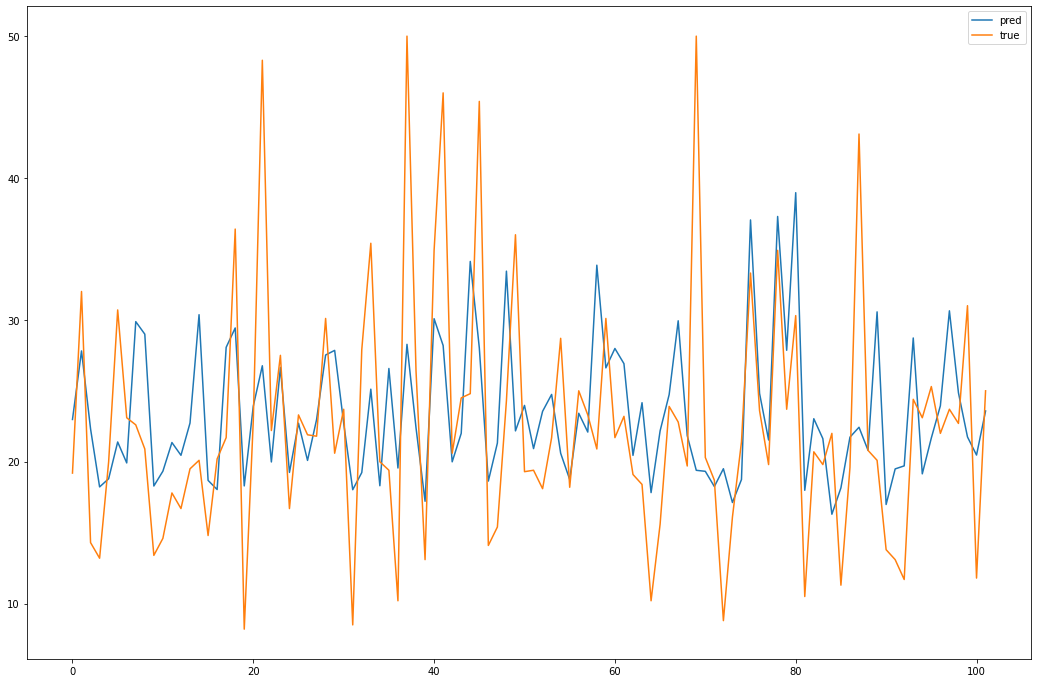

In [379]:
plt.figure(figsize=(18,12))
plt.plot(pred, label="pred")
plt.plot(test_target, label="true")

diff = pred.T - test_target.T
mean_delta = np.mean(diff[0] / test_target)
print(mean_delta)
#plt.plot((pred-test_target))
plt.legend()

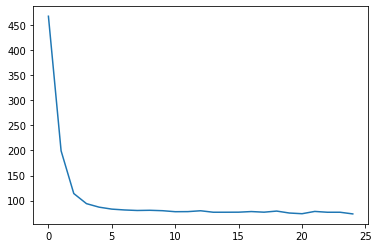

In [380]:
plt.plot(history.history["val_loss"])

array([[13.16599  ],
       [ 7.3022327],
       [14.609624 ],
       [15.192004 ],
       [13.845198 ],
       [14.087534 ],
       [19.437202 ],
       [ 7.2503157],
       [ 5.3902497],
       [19.202162 ],
       [18.07581  ],
       [16.866573 ],
       [16.83758  ],
       [13.347378 ],
       [ 6.801799 ],
       [14.098834 ],
       [14.92315  ],
       [ 7.73055  ],
       [ 6.4388824],
       [20.34637  ],
       [ 4.706514 ],
       [ 7.9324493],
       [ 8.644339 ],
       [ 8.426047 ],
       [17.564598 ],
       [11.012995 ],
       [18.709457 ],
       [ 9.715916 ],
       [ 3.1066272],
       [ 3.3652968],
       [10.405927 ],
       [21.417545 ],
       [21.315489 ],
       [ 7.6303024],
       [15.456126 ],
       [ 5.4497685],
       [19.777811 ],
       [ 7.112424 ],
       [ 7.779074 ],
       [19.945427 ],
       [ 6.630385 ],
       [ 7.0994654],
       [12.992925 ],
       [ 7.3126106],
       [ 6.0332465],
       [ 7.0722013],
       [16.98567  ],
       [17.23